In [ ]:
class data_gen:
    def __inti__(self):
        
        # end of lists below (y and u) represent newest elements while first element is oldest
        self.lst_y = [0]*3
        self.lst_u = [0]*2
        self.t = 0
        
    def output_meas(self, u):
        # append new control input to end of list and drop first element
        self.lst_u.insert(len(self.lst_u), self.lst_u.pop(0))
        self.lst_u[-1] = u
        
        # lst index [-1] signifies time t, [-2] signifies time (t-1) and so on
        if self.t <= 500:
            y_meas = self.lst_y[-1]/(1 + self.lst_y[-1]**2) + lst_u[-1]**3
            
        else:
            y_meas = ((self.lst_y[-1]*self.lst_y[-2]*self.lst_y[-3]*self.lst_u[-2]*
                     (self.lst_y[-3] - 1) + round(self.t/500)*self.lst_u[-1])/
                     (1 + self.lst_y[-2]**2 + self.lst_y[-3]**2))
        
        # append new output measurment to end of list and drop first element
        self.lst_y.insert(len(self.lst_y), self.lst_y.pop(0))
        self.lst_y[-1] = y_meas
        self.t += 1
        return y_meas
    

In [ ]:
import numpy as np
from scipy.ndimage.interpolation import shift

class IHOMFAC:
    __init__(self, eta, lam, mu, ro, eps, alpha, beta, phi_init):
        self.eta = eta
        self.lam = lam
        self.mu = mu
        self.ro = ro
        self.eps = eps
        
        self.alpha = np.arra(alpha).reshape(1,-1) # row vec
#         self.len_alpha = len(alpha)
        self.beta = np.arra(beta).reshape(1,-1) # row vec
#         self.len_beta = len(beta)
        
        self.y = np.array([0]*2)
        self.u = np.array([0]*self.len_alpha).reshape(-1,1) # col vec
        
        self.phi_init = phi_init
        self.phi_init_sign = np.sign(phi_init)
        self.phi = np.array([phi_init]*self.len_beta).reshape(-1,1) # col vec
        
    def param_est(self, y):
        self.y = shift(arr3, 1, cval=y) # shifts y arr right and replaces first val with new y meas
        
        sum_beta = self.beta@self.phi
        del_u_t_1 = self.u[1] - self.u[2]
        del_y_t = self.u[0] - self.u[1]
        
        # New phi estimate
        phi_est = (sum_beta + (self.eta*del_u_t_1)*(del_y_t - del_u_t_1*sum_beta)/(self.mu + del_u_t_1**2))
        
        if (phi_est <= self.eps) or (abs(del_u_t_1) <= self.esp) or (np.sign(phi_est) != self.phi_init_sign):
            phi_est = self.phi_init
            
        self.phi = shift(self.phi, [1,0], cval=phi_est) # shifts phi arr right and replaces first val with new phi est
        
        
        

In [28]:
import numpy as np
from scipy.ndimage.interpolation import shift

lst = [1,5,9]
lst2 = [2,2,2]
lst3 = [1,2,3]
arr = np.array(lst).reshape(-1,1)
arr2 = np.array(lst2).reshape(-1,1)
arr3 = np.array(lst3).reshape(-1,1)
# res = arr@arr2
print(arr3)
print(shift(arr3, [1,0], cval=10)) # rotates array 1 step along column and zero along row and replaces shifted val w/ 10
print(len(arr3))
# print(arr)
# print(np.roll(arr, 1))
# print(res)

[[1]
 [2]
 [3]]
[[10]
 [ 1]
 [ 2]]
3


In [30]:
import numpy as np

var = 16
var_sign = np.sign(var)
print(var_sign)


1


(0.0, 1000.0)

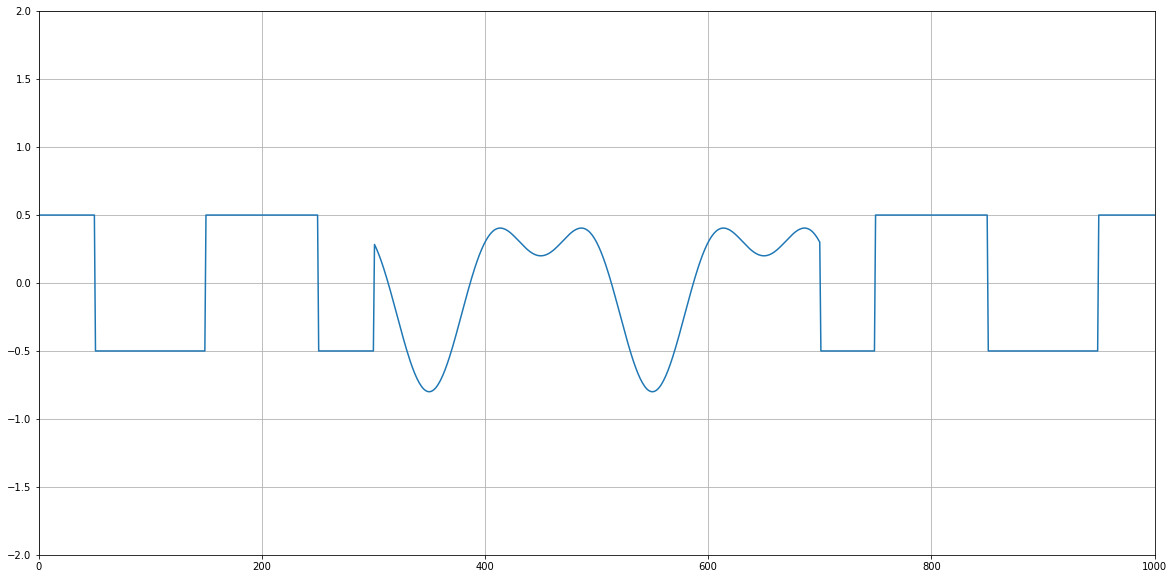

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
plt.rcParams['figure.figsize'] = [20, 10]

def desired_output(t):
    if (t <= 300) or (t > 700):
        y = 0.5*(-1)**(round(t/100))

    else:
        y = 0.5*np.sin(t*pi/100) + 0.3*np.cos(t*pi/50)

    return y

t = [i for i in range(1001)]
lst_y_desired = [desired_output(t_i) for t_i in t]

plt.plot(t, lst_y_desired)
plt.grid()
plt.ylim((-2,2))
plt.xlim((0,1000))